In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
import sklearn
import os
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv("Exam2019.csv")
df.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [3]:
stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,Default,2,0.0,70.0,int64
11,residence,4,0.0,41.3,int64
19,tele,2,0.0,59.6,object
18,liable,2,0.0,84.5,int64
17,job,4,0.0,63.0,object
16,cards,4,0.0,63.3,int64
15,housing,3,0.0,71.3,object
14,otherplans,3,0.0,81.4,object
13,age,53,0.0,5.1,int64
12,property,4,0.0,33.2,object


0    700
1    300
Name: Default, dtype: int64

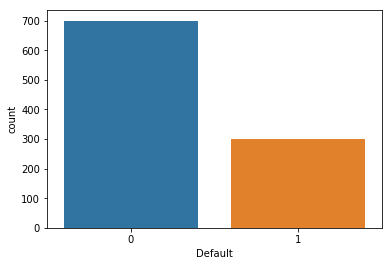

In [4]:
ax = sns.countplot(x="Default", data=df)
df['Default'].value_counts()

In [5]:
df['amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: amount, dtype: float64

In [6]:
df['monthlyamount'] = df['amount']/df['duration']
df['monthlyamount'].describe()

count    1000.000000
mean      167.687020
std       153.490959
min        24.055556
25%        89.600000
50%       130.333333
75%       206.183333
max      2482.666667
Name: monthlyamount, dtype: float64

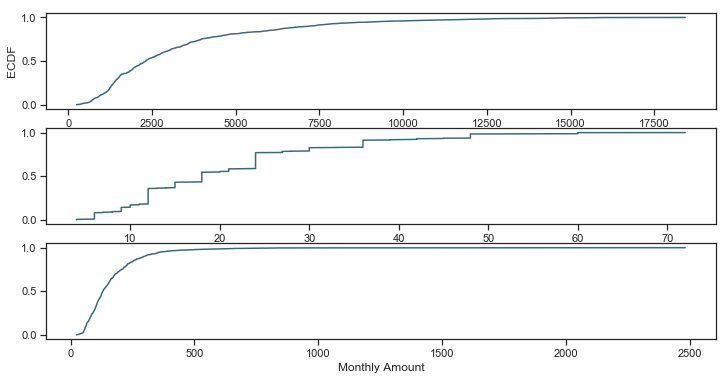

In [7]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF
#ECDF: empirical cumulative distribution function
sns.set(style = "ticks")
c = '#386B7F'
plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(df['amount'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Amount'); plt.ylabel('ECDF');


plt.subplot(312)
cdf = ECDF(df['duration'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Duration');


plt.subplot(313)
cdf = ECDF(df['monthlyamount'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Monthly Amount');

In [8]:
df.groupby('duration')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
duration,,,,,,,,
4,6.0,1662.833333,915.152319,601.0,1464.75,1498.5,1533.75,3380.0
5,1.0,3448.000000,NaN,3448.0,3448.00,3448.0,3448.00,3448.0
6,75.0,1787.733333,2422.428463,250.0,691.50,1237.0,1746.50,14896.0
7,5.0,1779.200000,910.095435,730.0,846.00,2329.0,2415.00,2576.0
8,7.0,1373.000000,928.221597,731.0,833.50,1164.0,1325.50,3398.0
9,49.0,1714.714286,931.806154,276.0,1154.00,1391.0,2134.00,5129.0
10,28.0,1888.964286,1285.531638,727.0,1237.75,1469.5,2162.00,7308.0
11,9.0,3047.888889,2069.404289,1154.0,1393.00,2142.0,3939.00,7228.0
12,179.0,1787.446927,1266.271498,339.0,954.50,1412.0,2160.00,7865.0


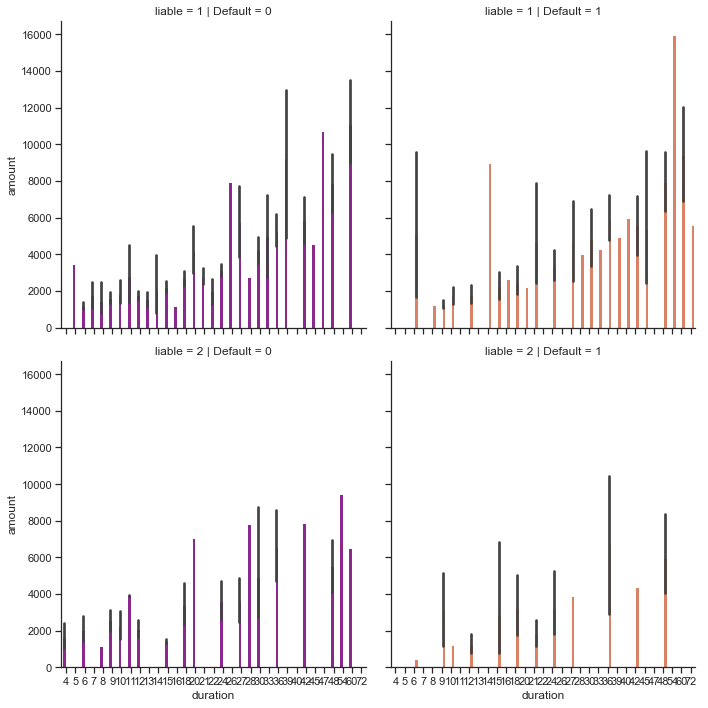

In [9]:
#liablebyduration
sns.catplot(data = df, x = 'duration', y = "amount", 
               col = 'Default',
               palette = 'plasma',
               hue = 'Default',
               row = 'liable',
            kind="bar",
               color = c) 

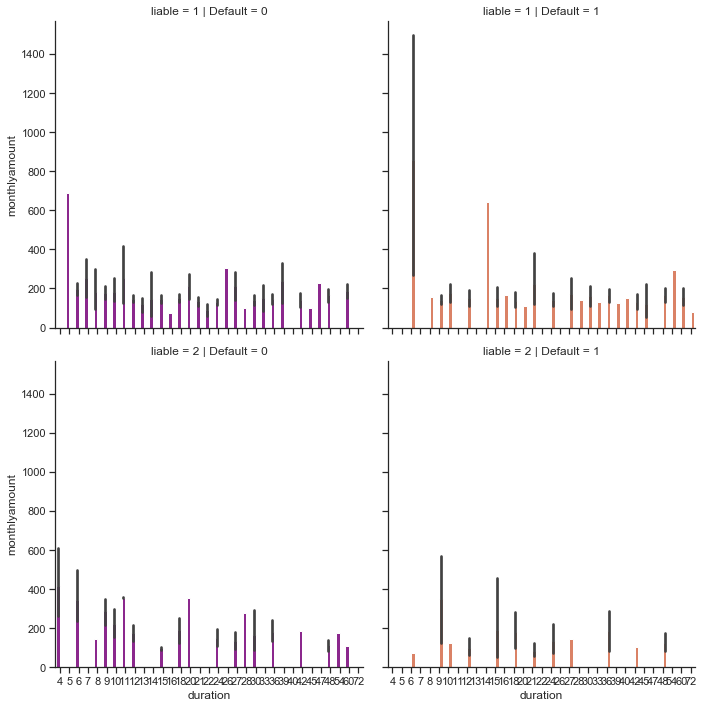

In [10]:
sns.catplot(data = df, x = 'duration', y = "monthlyamount", 
               col = 'Default',
               palette = 'plasma',
               hue = 'Default',
               row = 'liable',
            kind="bar",
               color = c) 

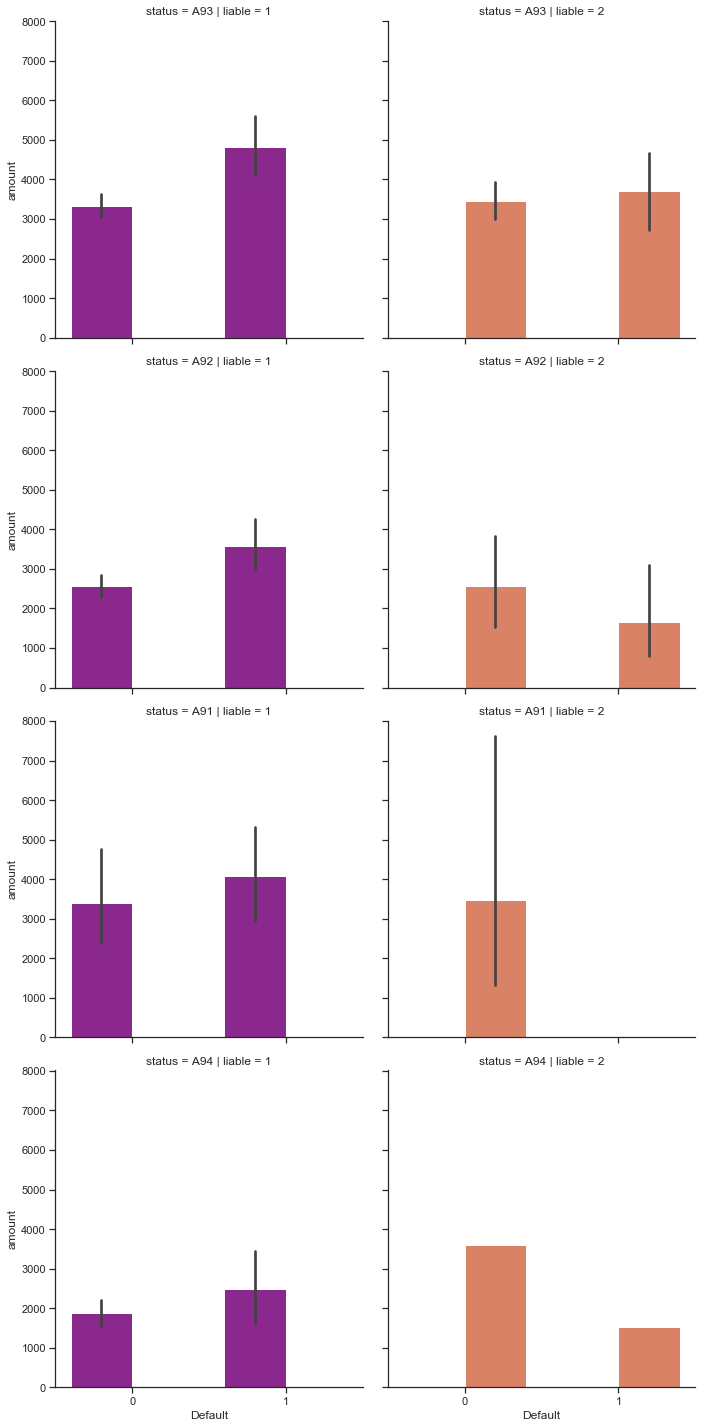

In [11]:
sns.catplot(data = df, x = 'Default', y = "amount", 
               col = 'liable',
               palette = 'plasma',
               hue = 'liable',
               row = 'status',
            kind="bar",
               color = c) 

In [12]:
df.groupby('Default')['monthlyamount'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,700.0,165.819730,110.574834,25.250000,96.906250,134.916667,211.975000,1126.833333
1,300.0,172.044031,223.840381,24.055556,76.197917,121.058333,196.361111,2482.666667


In [13]:
df.groupby('liable')['monthlyamount'].describe()

,count,mean,std,min,25%,50%,75%,max
liable,,,,,,,,
1,845.0,161.998234,152.731826,24.055556,87.380952,128.222222,196.037037,2482.666667
2,155.0,198.700085,154.404834,39.458333,94.675926,152.583333,266.645833,1126.833333


In [14]:
interval = (18, 25, 35, 60, 120)

cats = ['Gen Z', 'Millenial', 'Gen X', 'Baby Boomer']
df["age"] = pd.cut(df.age, interval, labels=cats)

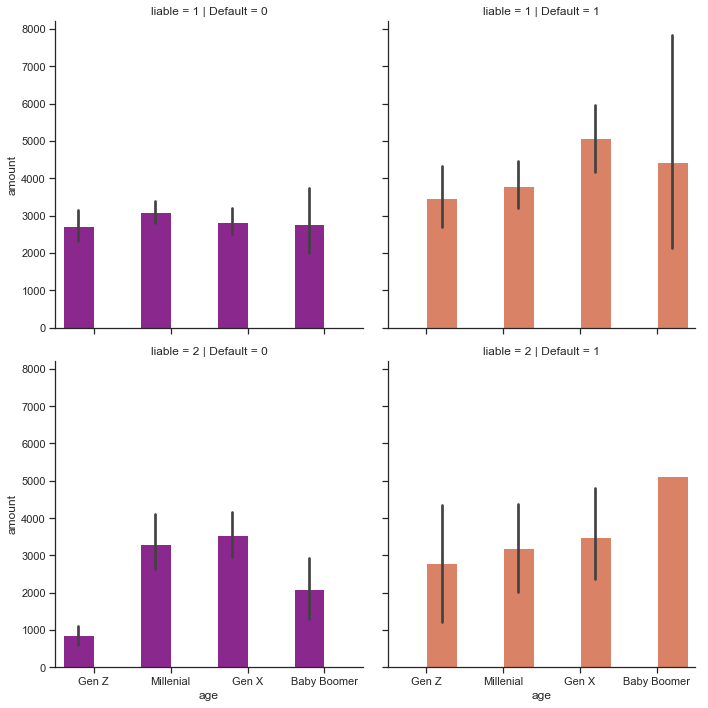

In [15]:
sns.catplot(data = df, x = 'age', y = "amount", 
               col = 'Default',
               palette = 'plasma',
               hue = 'Default',
               row = 'liable',
            kind="bar",
               color = c) 

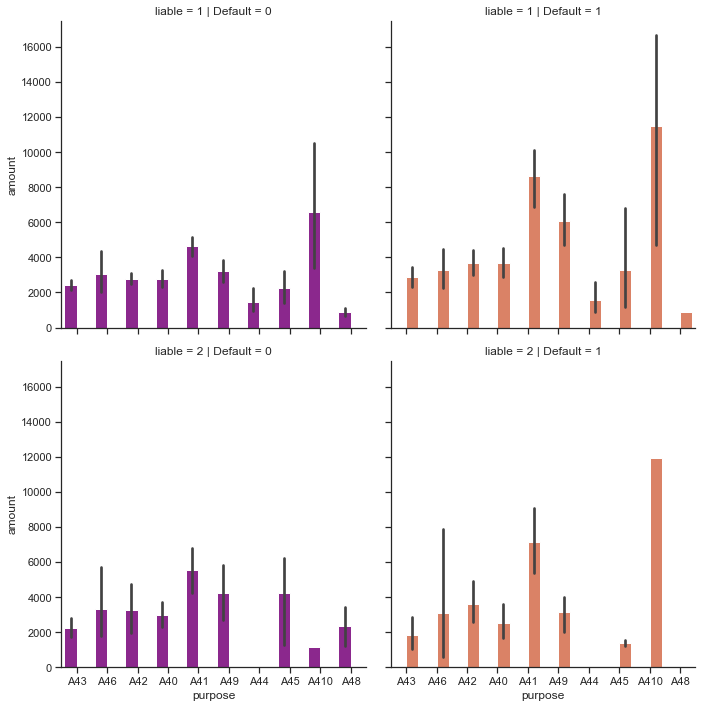

In [16]:
sns.catplot(data = df, x = 'purpose', y = "amount", 
               col = 'Default',
               palette = 'plasma',
               hue = 'Default',
               row = 'liable',
            kind="bar",
               color = c)

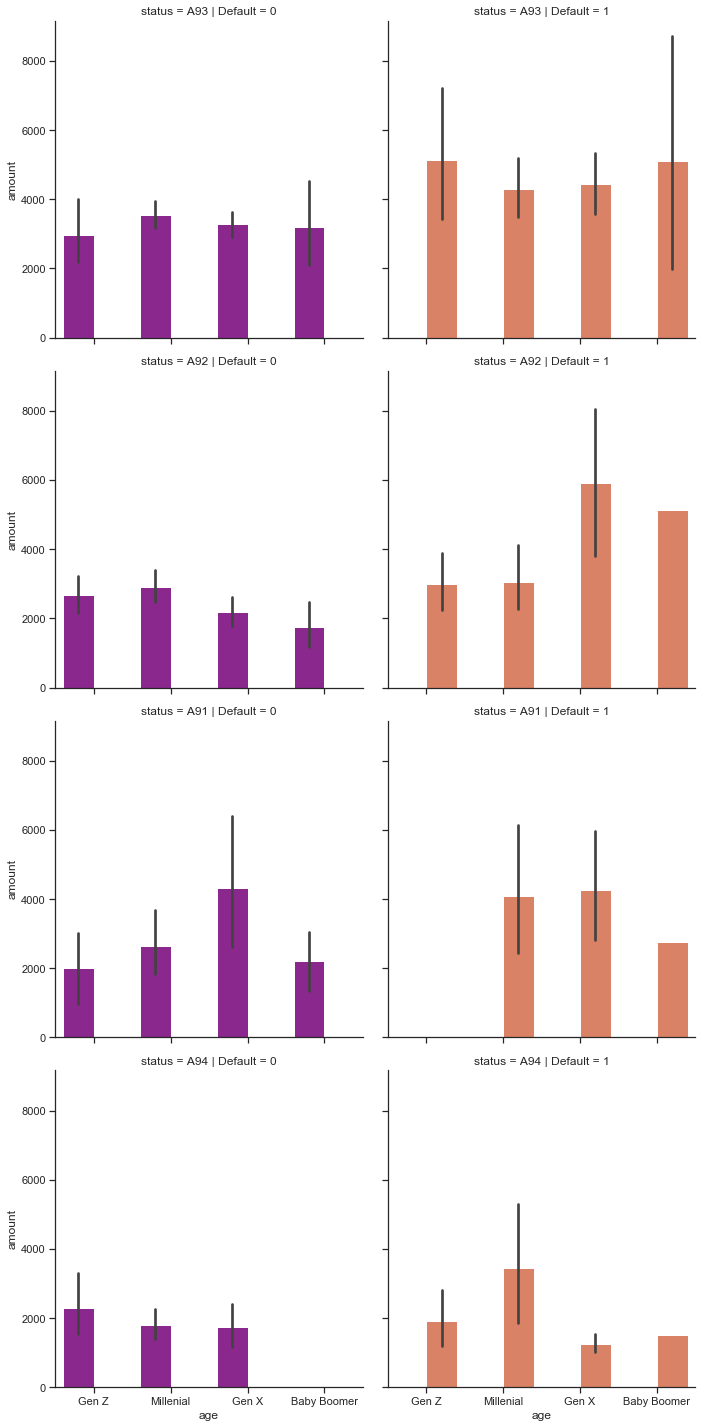

In [17]:
sns.catplot(data = df, x = 'age', y = "amount", 
               col = 'Default',
               palette = 'plasma',
               hue = 'Default',
               row = 'status',
            kind="bar",
               color = c) 

In [18]:
df.corr()

,Default,duration,amount,installment,residence,cards,liable,monthlyamount
Default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.045732,-0.003015,0.018592
duration,0.214927,1.000000,0.624984,0.074749,0.034067,-0.011284,-0.023834,-0.126498
amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.020795,0.017142,0.521938
installment,0.072404,0.074749,-0.271316,1.000000,0.049302,0.021669,-0.071207,-0.396191
residence,0.002967,0.034067,0.028926,0.049302,1.000000,0.089625,0.042643,0.009277
cards,-0.045732,-0.011284,0.020795,0.021669,0.089625,1.000000,0.109667,-0.003556
liable,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.109667,1.000000,0.086580
monthlyamount,0.018592,-0.126498,0.521938,-0.396191,0.009277,-0.003556,0.086580,1.000000


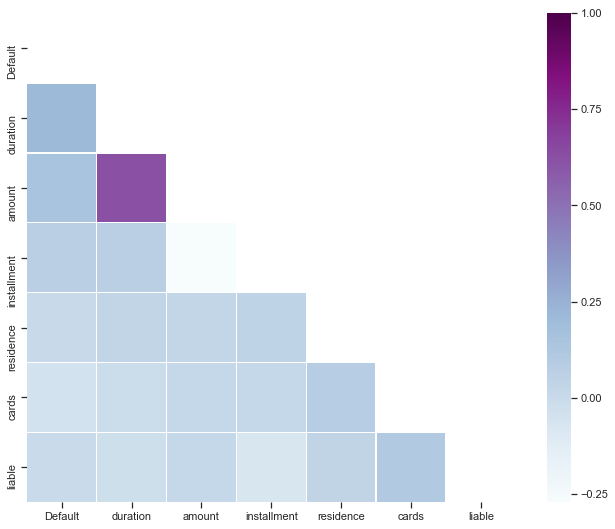

In [19]:
# Compute the correlation matrix 
corr_all = df.drop('monthlyamount', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

Text(0.5, 1.0, 'Credit amount distribution for bad transactions')

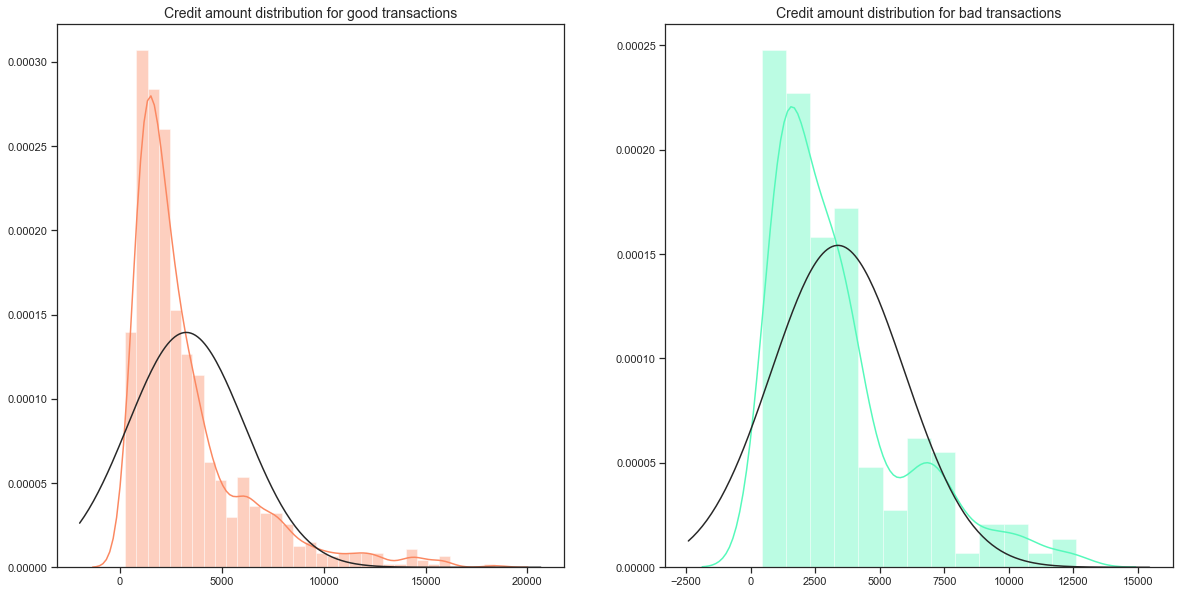

In [20]:
from scipy.stats import norm

f, (ax1,ax2) =plt.subplots(1,2, figsize=(20, 10))

credit_amount_dist = df['amount'].loc[df['liable'] == 1].values
sns.distplot(credit_amount_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Credit amount distribution for good transactions', fontsize=14)

credit_amount_dist = df['amount'].loc[df['liable'] == 2].values
sns.distplot(credit_amount_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Credit amount distribution for bad transactions', fontsize=14)


 mu = 3271.26 and sigma = 2821.33



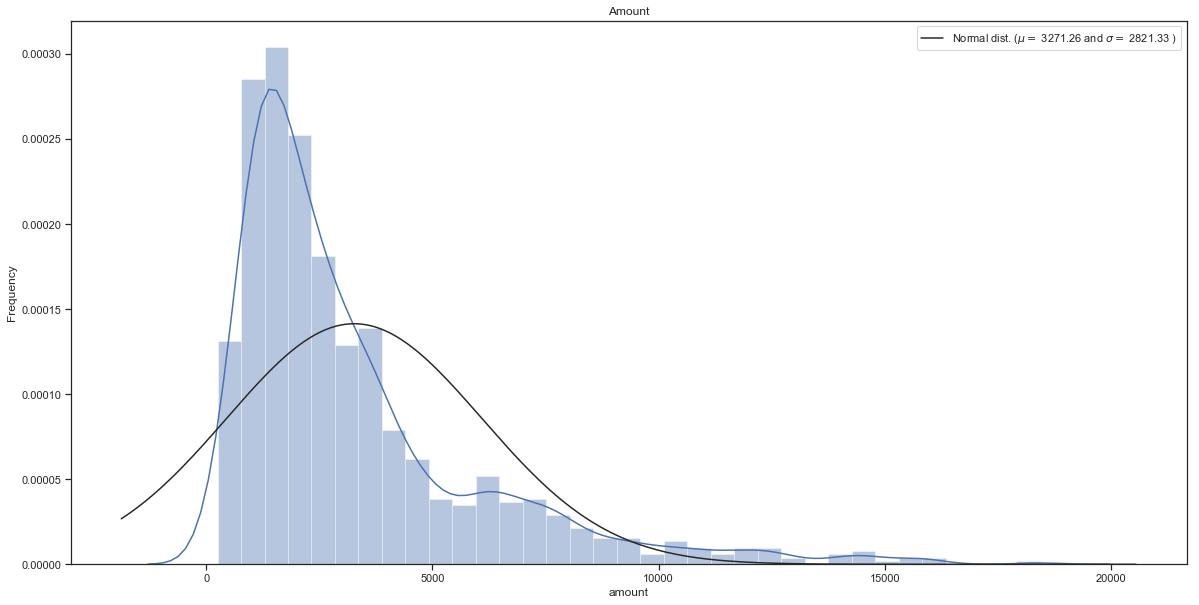

<Figure size 432x288 with 0 Axes>

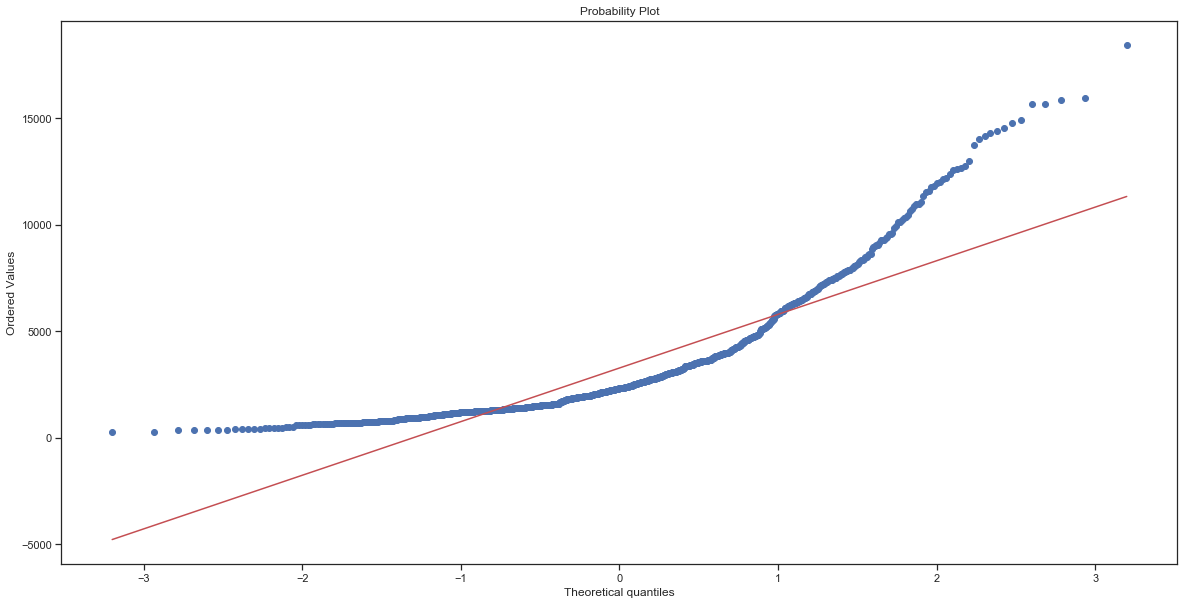

In [21]:
from scipy import stats
from scipy.stats import norm, skew
plt.figure(figsize=(20,10))
sns.distplot(df['amount'] , fit=norm);

#Fitted parameters used by the function
(mu, sigma) = norm.fit(df['amount'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Amount')

#QQ-plot
fig = plt.figure()
plt.figure(figsize=(20,10))
res = stats.probplot(df['amount'], plot=plt)
plt.show()

In [22]:
df = df.dropna(how='any')

In [23]:
#multiplelinearregression
from statsmodels.formula.api import ols
model = ols("Default ~ age + checkingstatus1 + duration + history + purpose + amount +savings +employ+installment+status+residence+property+age+otherplans+housing+cards+job+liable+tele+foreign+monthlyamount", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Default   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     7.520
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           3.12e-41
Time:                        15:53:36   Log-Likelihood:                -474.73
No. Observations:                1000   AIC:                             1049.
Df Residuals:                     950   BIC:                             1295.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.5409      0.172      3.136      0.002       0.202       0.879
age[T.Millenial]          -0.0695      0.039     -1.793      0.073      -0.146       0.007
age[T.Gen X]              -0.0972      0.043     -2.265      0.024      -0.181      -0.013
age[T.Baby Boomer]        -0.1203      0.073     -1.644      0.100      -0.264       0.023
checkingstatus1[T.A12]    -0.0845      0.037     -2.301      0.022      -0.157      -0.012
checkingstatus1[T.A13]    -0.1720      0.058     -2.969      0.003      -0.286      -0.058
checkingstatus1[T.A14]    -0.2595      0.035     -7.487      0.000      -0.327      -0.191
history[T.A31]            -0.0069      0.090     -0.076      0.939      -0.184       0.170
history[T.A32]            -0.1573      0.071     -2.211      0.027      -0.297      -0.018
history[T.A33]            -0.1874      0.078     -2.399      0.017      -0.341      -0.034
history[T.A34]            -0.2669      0.072     -3.703      0.000      -0.408      -0.125
purpose[T.A41]            -0.2320      0.051     -4.594      0.000      -0.331      -0.133
purpose[T.A410]           -0.2136      0.125     -1.706      0.088      -0.459       0.032
purpose[T.A42]            -0.1258      0.042     -3.024      0.003      -0.207      -0.044
purpose[T.A43]            -0.1449      0.037     -3.875      0.000      -0.218      -0.072
purpose[T.A44]            -0.0686      0.120     -0.570      0.569      -0.305       0.167
purpose[T.A45]            -0.0527      0.091     -0.578      0.563      -0.232       0.126
purpose[T.A46]             0.0266      0.064      0.416      0.678      -0.099       0.152
purpose[T.A48]            -0.2327      0.139     -1.670      0.095      -0.506       0.041
purpose[T.A49]            -0.1103      0.052     -2.130      0.033      -0.212      -0.009
savings[T.A62]            -0.0448      0.045     -1.006      0.315      -0.132       0.043
savings[T.A63]            -0.0707      0.055     -1.289      0.198      -0.178       0.037
savings[T.A64]            -0.1292      0.062     -2.098      0.036      -0.250      -0.008
savings[T.A65]            -0.1190      0.036     -3.334      0.001      -0.189      -0.049
employ[T.A72]             -0.0079      0.069     -0.113      0.910      -0.144       0.128
employ[T.A73]             -0.0400      0.066     -0.604      0.546      -0.170       0.090
employ[T.A74]             -0.1286      0.069     -1.856      0.064      -0.265       0.007
employ[T.A75]             -0.0539      0.066     -0.811      0.417      -0.184       0.076
status[T.A92]             -0.0679      0.063     -1.071      0.284      -0.192       0.056
status[T.A93]             -0.1389      0.062     -2.257      0.024      -0.260      -0.018
status[T.A94]             -0.0936      0.073     -1.277      0.202      -0.238  

In [24]:
df["amount"] = np.log1p(df["amount"])
df["duration"] = np.log1p(df["duration"])
df["monthlyamount"] = np.log1p(df["monthlyamount"])

In [25]:
df = df.dropna(how='any')

In [26]:
from sklearn.preprocessing import StandardScaler
SC= StandardScaler()
credit=df['amount'].values
durationcredit = df["duration"].values
creditmonth=df['monthlyamount'].values
credit= credit.reshape(-1,1)
durationcredit = durationcredit.reshape(-1,1)
creditmonth=creditmonth.reshape(-1,1)
df["amount"]= SC.fit_transform(credit)
df["duration"] = SC.fit_transform(durationcredit)
df["monthlyamount"] = SC.fit_transform(creditmonth)


 mu = 0.00 and sigma = 1.00



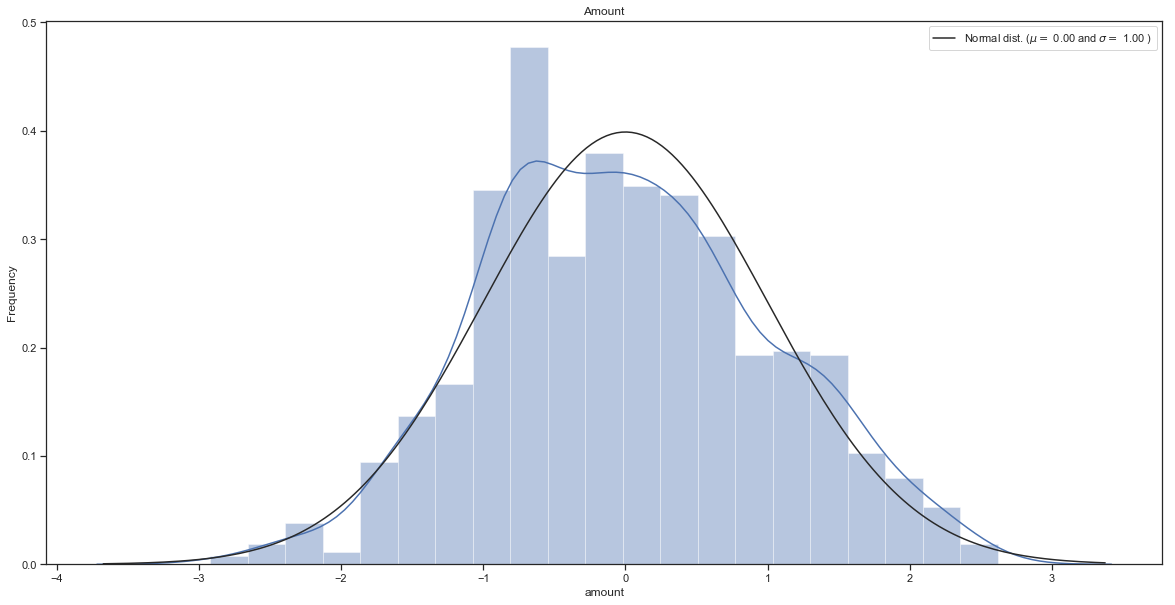

<Figure size 432x288 with 0 Axes>

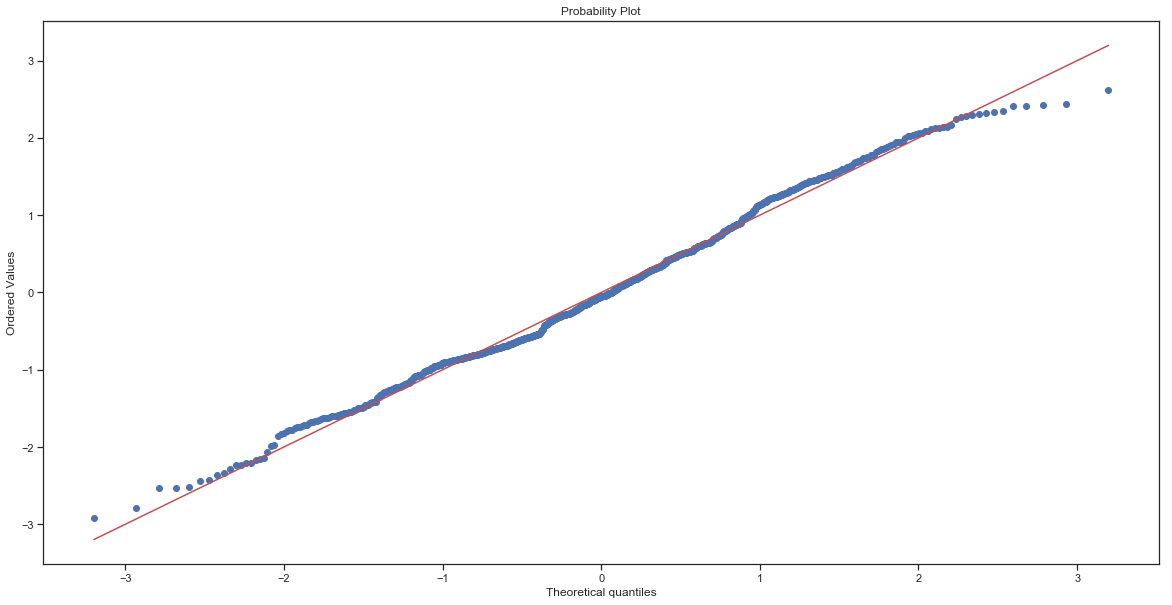

In [27]:
plt.figure(figsize=(20,10))
sns.distplot(df['amount'] , fit=norm);

(mu, sigma) = norm.fit(df['amount'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Amount')

fig = plt.figure()
plt.figure(figsize=(20,10))
res = stats.probplot(df['amount'], plot=plt)
plt.show()


 mu = 0.00 and sigma = 1.00



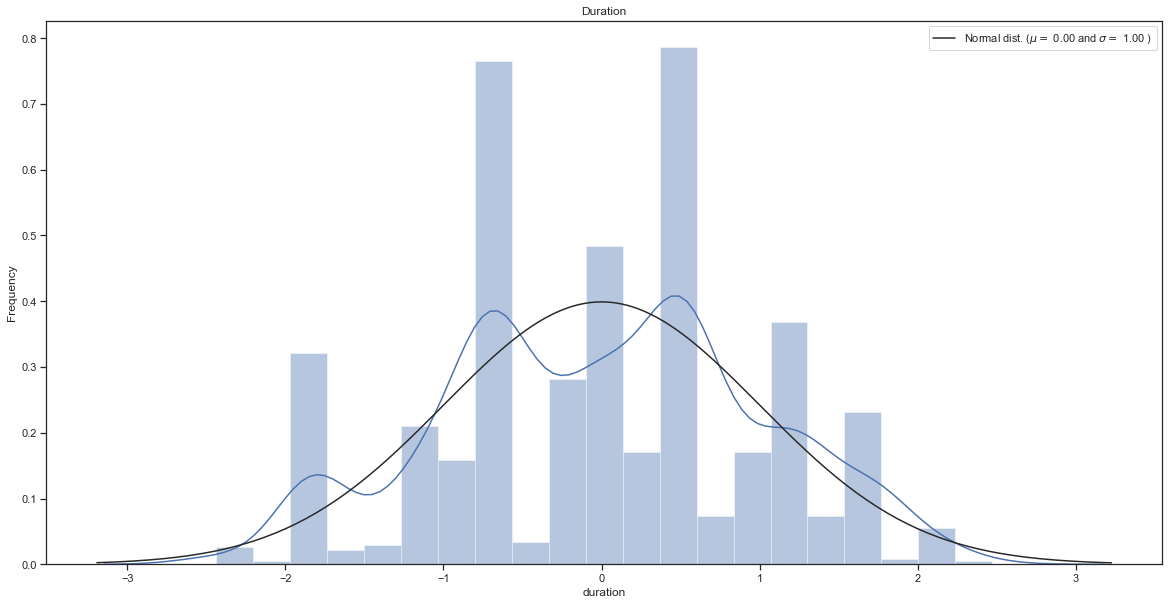

<Figure size 432x288 with 0 Axes>

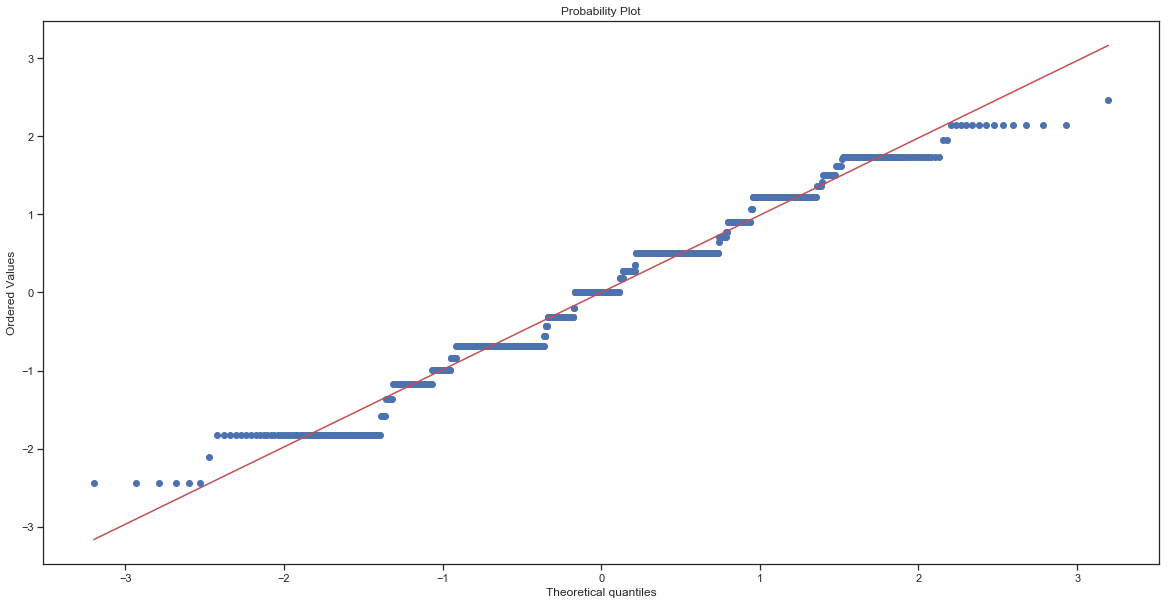

In [28]:
plt.figure(figsize=(20,10))
sns.distplot(df['duration'] , fit=norm);

(mu, sigma) = norm.fit(df['duration'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Duration')

fig = plt.figure()
plt.figure(figsize=(20,10))
res = stats.probplot(df['duration'], plot=plt)
plt.show()


 mu = 0.00 and sigma = 1.00



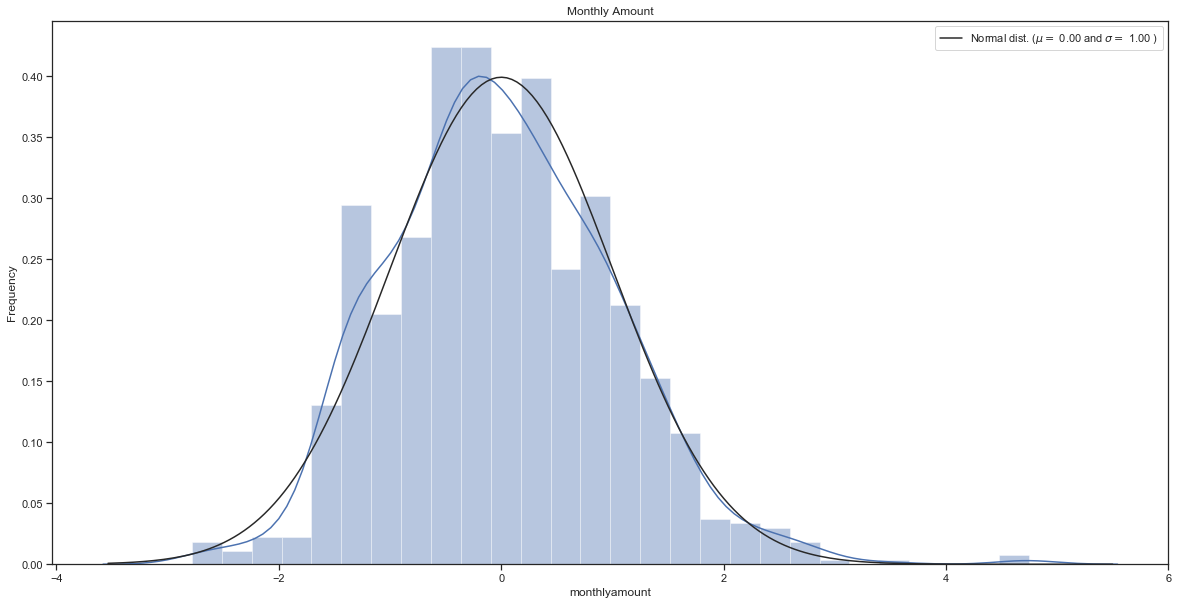

<Figure size 432x288 with 0 Axes>

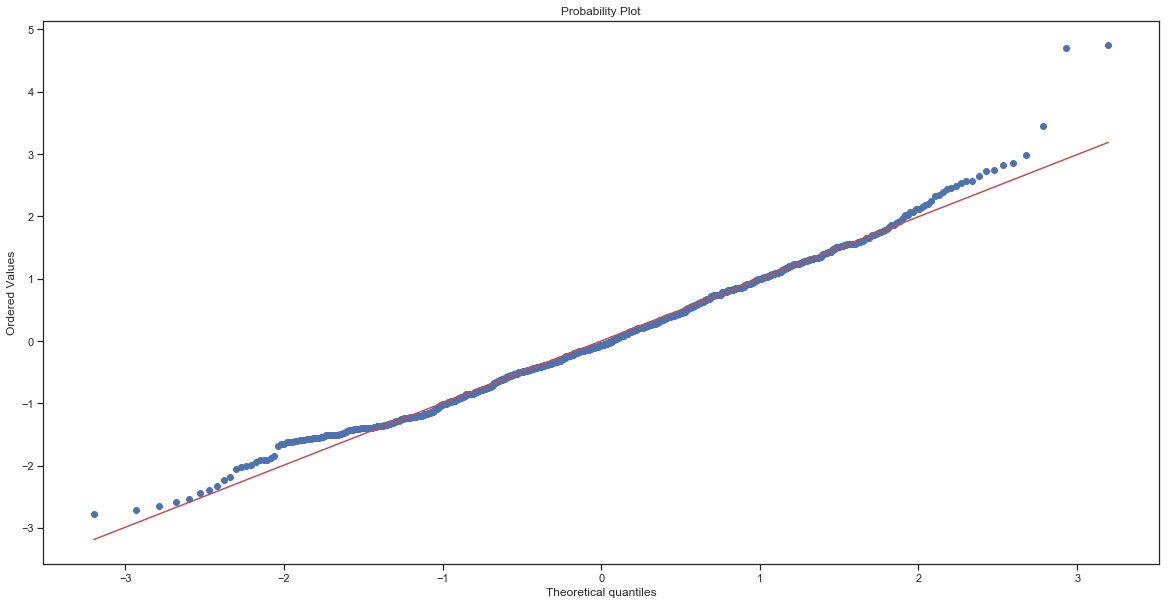

In [29]:
plt.figure(figsize=(20,10))
sns.distplot(df['monthlyamount'] , fit=norm);

(mu, sigma) = norm.fit(df['monthlyamount'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Monthly Amount')

fig = plt.figure()
plt.figure(figsize=(20,10))
res = stats.probplot(df['monthlyamount'], plot=plt)
plt.show()

In [30]:
#dummyvariables
df = df.merge(pd.get_dummies(df.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.status, drop_first=True, prefix='status'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["savings"], drop_first=True, prefix='savings'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["checkingstatus1"], drop_first=True, prefix='checkingstatus1'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.housing, drop_first=True, prefix='housing'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.job, drop_first=True, prefix='job'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.age, drop_first=True, prefix='age'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.history, drop_first=True, prefix='history'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.employ, drop_first=True, prefix='employ'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.others, drop_first=True, prefix='others'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.property, drop_first=True, prefix='property'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.otherplans, drop_first=True, prefix='otherplans'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.tele, drop_first=True, prefix='tele'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.foreign, drop_first=True, prefix='foreign'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.installment, drop_first=True, prefix='installment'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.residence, drop_first=True, prefix='residence'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.cards, drop_first=True, prefix='cards'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.liable, drop_first=True, prefix='liable'), left_index=True, right_index=True)

In [31]:
#deleteoldervariables
del df["checkingstatus1"]
del df["savings"]
del df["job"]
del df["status"]
del df["purpose"]
del df["housing"]
del df["history"]
del df["employ"]
del df["others"]
del df["property"]
del df["otherplans"]
del df["age"]
del df["tele"]
del df["foreign"]
del df["installment"]
del df["residence"]
del df["cards"]
del df["liable"]

In [32]:
list(df)

['Default',
 'duration',
 'amount',
 'monthlyamount',
 'purpose_A41',
 'purpose_A410',
 'purpose_A42',
 'purpose_A43',
 'purpose_A44',
 'purpose_A45',
 'purpose_A46',
 'purpose_A48',
 'purpose_A49',
 'status_A92',
 'status_A93',
 'status_A94',
 'savings_A62',
 'savings_A63',
 'savings_A64',
 'savings_A65',
 'checkingstatus1_A12',
 'checkingstatus1_A13',
 'checkingstatus1_A14',
 'housing_A152',
 'housing_A153',
 'job_A172',
 'job_A173',
 'job_A174',
 'age_Millenial',
 'age_Gen X',
 'age_Baby Boomer',
 'history_A31',
 'history_A32',
 'history_A33',
 'history_A34',
 'employ_A72',
 'employ_A73',
 'employ_A74',
 'employ_A75',
 'others_A102',
 'others_A103',
 'property_A122',
 'property_A123',
 'property_A124',
 'otherplans_A142',
 'otherplans_A143',
 'tele_A192',
 'foreign_A202',
 'installment_2',
 'installment_3',
 'installment_4',
 'residence_2',
 'residence_3',
 'residence_4',
 'cards_2',
 'cards_3',
 'cards_4',
 'liable_2']

In [33]:
X = df
X = df.drop('Default', axis= 1)
y = df['Default']
np.random.seed(8888)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 1)

In [34]:
X_train.head()

,duration,amount,monthlyamount,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,...,installment_2,installment_3,installment_4,residence_2,residence_3,residence_4,cards_2,cards_3,cards_4,liable_2
298,0.006404,0.053091,0.043188,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
160,0.508940,0.224148,-0.208594,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
268,-0.426460,1.693211,2.529390,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
658,0.902843,0.720421,0.054527,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
996,0.902843,0.604188,-0.092061,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [35]:
import prince
mca = prince.MCA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=88)
mca = mca.fit(X)

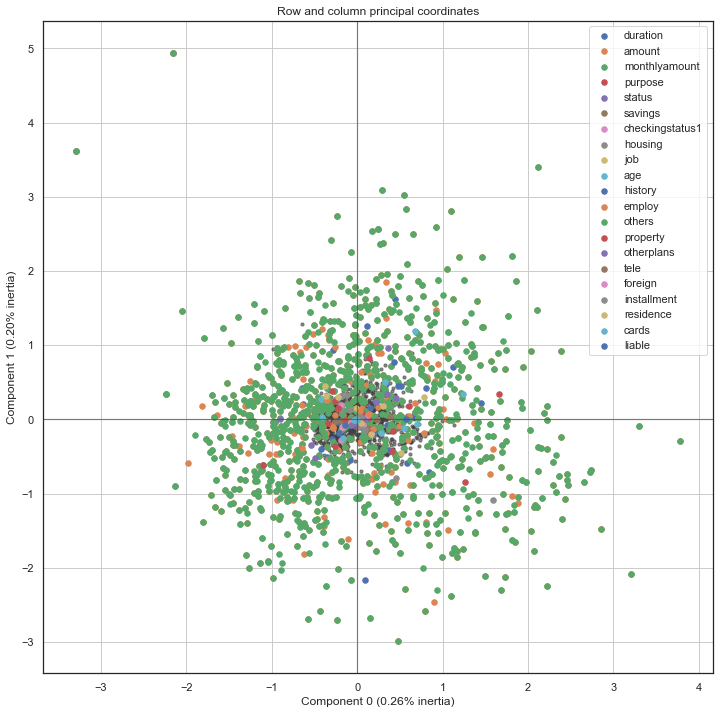

In [36]:
ax = mca.plot_coordinates(X=X,ax=None,figsize=(12, 12),show_row_points=True,row_points_size=10,show_row_labels=False,show_column_points=True,column_points_size=30,show_column_labels=False,legend_n_cols=1)

In [37]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, n_iter=100, random_state= 0)
X_train_svd= svd.fit_transform(X_train)

In [38]:
explained_variance=svd.explained_variance_ratio_
explained_variance

array([0.01520214, 0.19431503, 0.11739321, 0.06620668, 0.05199706,
       0.03916134, 0.03282618, 0.03252019, 0.03035535, 0.02858169,
       0.02729056, 0.02547824, 0.02389255, 0.02193007, 0.02027793,
       0.0193713 , 0.01761134, 0.01616133, 0.01564166, 0.01530376,
       0.01419751, 0.0135768 , 0.01243597, 0.01162542, 0.01147481,
       0.01054264, 0.01010136, 0.00994327, 0.00871297, 0.00798099,
       0.00734959, 0.00695253, 0.00591245, 0.00524457, 0.00498278,
       0.00471904, 0.00430955, 0.00413057, 0.00375845, 0.00344596,
       0.00300459, 0.00287146, 0.00276869, 0.00271621, 0.002624  ,
       0.00205521, 0.00196426, 0.00186495, 0.0013684 , 0.0012687 ])

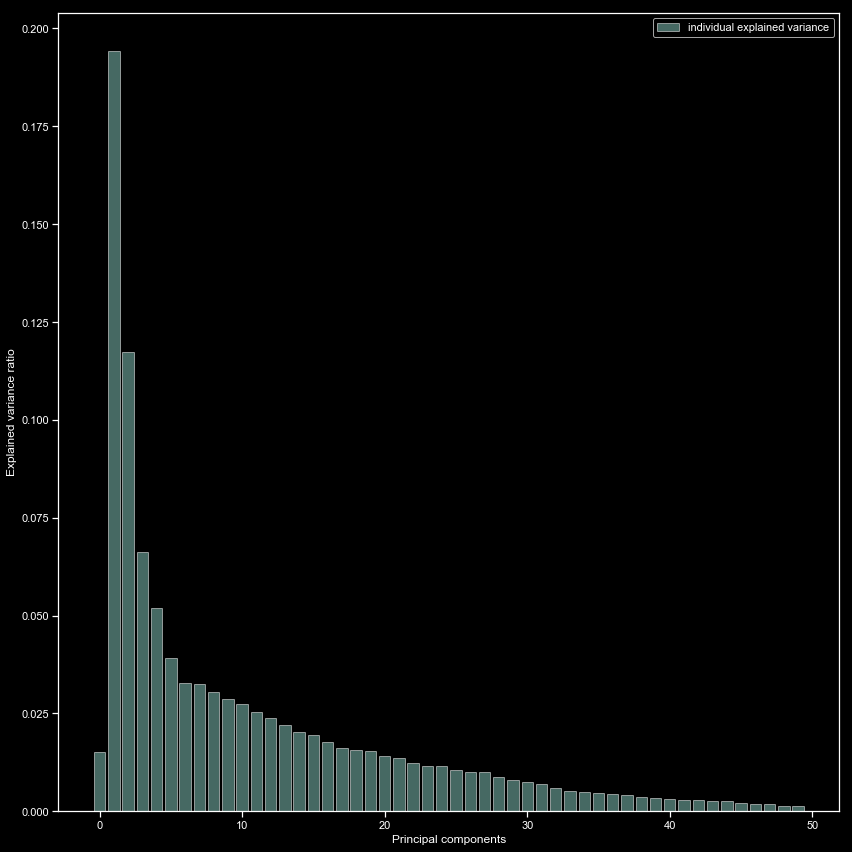

In [39]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(12, 12))
    plt.bar(range(50), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [40]:
X_train_svd= pd.DataFrame(X_train_svd)
X_train_svd.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2.610098,-0.180235,0.266977,0.243400,0.615529,-0.185082,-1.180846,-0.028663,0.524433,0.171748,...,0.013410,-0.144952,0.018473,-0.041541,0.130927,-0.047983,0.002356,-0.055478,-0.016631,0.042705
1,2.647036,-0.361987,-0.370940,1.360727,-0.229520,0.175271,-0.553938,0.004176,0.032118,0.577794,...,-0.017581,-0.030120,0.031011,0.065399,0.042949,-0.090925,0.036742,-0.144580,0.040862,0.060658
2,1.774300,-2.407051,1.937255,0.530906,1.100389,-0.147029,0.393028,0.860117,-0.098515,0.723214,...,0.549197,0.106158,0.449721,-0.069811,0.306048,0.056793,-0.106228,-0.088393,-0.033226,-0.376876
3,2.118157,-0.934897,-0.536733,-1.265082,-0.377235,1.051577,0.394040,-0.153699,0.628725,-0.654176,...,-0.065400,0.186781,0.223664,0.191698,0.121571,0.081494,0.033637,0.080725,0.037553,0.071145
4,2.155044,-0.795822,-0.728839,0.202123,0.918632,-0.317981,-0.073737,0.995610,0.349687,-0.130025,...,-0.145503,-0.020619,-0.030789,-0.060315,0.136069,-0.116089,-0.160634,-0.075898,-0.046991,-0.387555


In [41]:
X_test_svd= svd.transform(X_test)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [43]:
classifier = LogisticRegression()
parameters = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator= classifier,param_grid= parameters, cv=5,  n_jobs= -1)

In [44]:
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
cm= confusion_matrix(y_test, y_pred)
labels = ['Bad', 'Good']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

         Bad       0.77      0.95      0.85       176
        Good       0.76      0.34      0.47        74

   micro avg       0.77      0.77      0.77       250
   macro avg       0.77      0.65      0.66       250
weighted avg       0.77      0.77      0.74       250



In [46]:
import sklearn
from sklearn import*
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes', 'XGBoost']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0, max_depth = 50), GaussianNB(), XGBClassifier(max_depth= 50, n_estimators=100)]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Accuracy
Logistic Regression,0.768
Linear Svm,0.764
Random forest,0.764
XGBoost,0.736
Radial Svm,0.732
KNN,0.720
Naive Bayes,0.700
Decision Tree,0.668


In [47]:
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(X_train,y_train)
predictionRF=modelRF.predict(X_test)
pd.Series(modelRF.feature_importances_,index=X_train.columns).sort_values(ascending=False)

amount                 0.118990
monthlyamount          0.109528
duration               0.073908
checkingstatus1_A14    0.066155
history_A34            0.026414
otherplans_A143        0.020036
installment_4          0.020009
tele_A192              0.019176
checkingstatus1_A12    0.018352
age_Gen X              0.017834
housing_A152           0.017378
residence_4            0.017123
purpose_A43            0.016818
age_Millenial          0.016603
savings_A65            0.016362
employ_A73             0.015942
cards_2                0.015592
property_A122          0.015524
employ_A75             0.015500
job_A173               0.015493
property_A123          0.015381
history_A32            0.015069
status_A93             0.014532
employ_A72             0.014460
purpose_A42            0.014225
residence_2            0.014038
installment_2          0.013976
purpose_A41            0.013898
others_A102            0.013192
status_A92             0.013164
liable_2               0.013072
job_A174

In [48]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)
import xgboost as xgb

In [49]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(X_train,y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(X_train,y_train)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(y_test, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(y_test, y_pred_prob_SVMrbf)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(X_train,y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train,y_train)
y_pred_prob_KNN = modelKNN.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(X_train,y_train)
y_pred_prob_Tree = modelTree.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0, max_depth=50)
modelRF.fit(X_train,y_train)
y_pred_prob_rf = modelRF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)


# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(X_train,y_train)
y_pred_prob_nb = modelNB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb)

#XGBoost
modelXGB = xgb.XGBClassifier(max_depth= 50, n_estimators=100)
modelXGB.fit(X_train, y_train)
y_pred_prob_xgb = modelXGB.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
precision_xgb, recall_xgb, th_xgb = precision_recall_curve(y_test, y_pred_prob_xgb)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


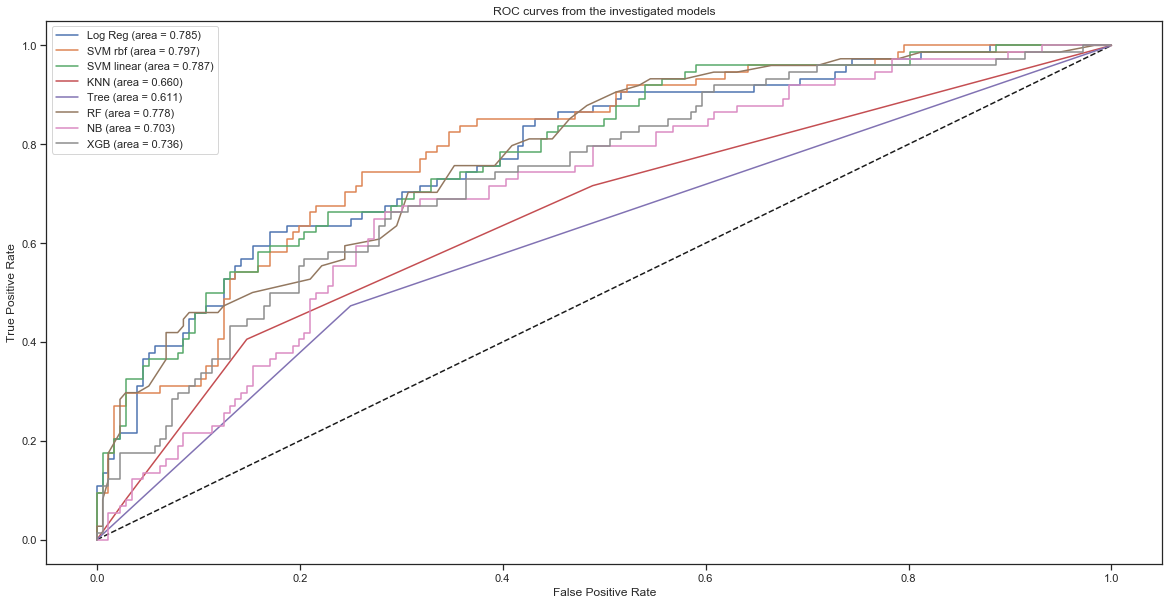

In [50]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.plot(fpr_xgb, tpr_xgb, label='XGB (area = %0.3f)' % roc_auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

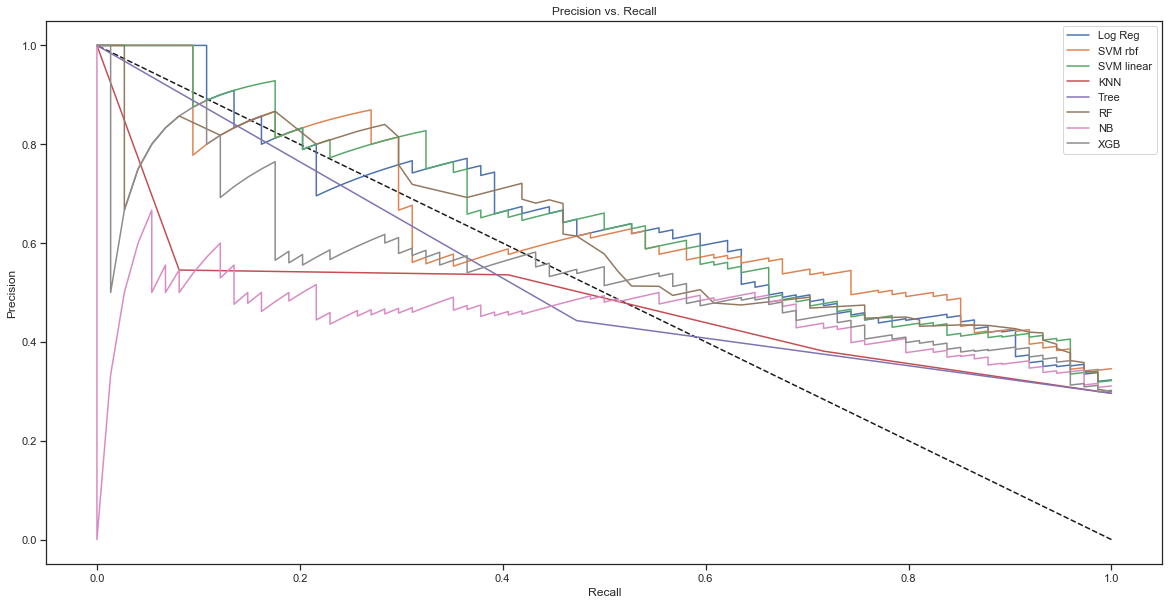

In [51]:
plt.figure(figsize=(20,10))
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.plot(recall_xgb, precision_xgb, label='XGB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# fix random seed for reproducibility
np.random.seed(8)

Using TensorFlow backend.


In [53]:
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [54]:
model = Sequential()
model.add(Dense(8, input_dim=57, activation='relu'))
model.add(Dense(12, input_dim=57, activation='relu'))
model.add(Dense(12, input_dim=57, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
epoch = 200
batch_size = 128

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, 
          validation_data = (X_test, y_test), verbose = 2)

Instructions for updating:
Use tf.cast instead.
Train on 750 samples, validate on 250 samples
Epoch 1/200
 - 1s - loss: 0.7025 - acc: 0.4233 - val_loss: 0.6973 - val_acc: 0.4540
Epoch 2/200
 - 0s - loss: 0.6953 - acc: 0.4893 - val_loss: 0.6921 - val_acc: 0.5060
Epoch 3/200
 - 0s - loss: 0.6912 - acc: 0.5387 - val_loss: 0.6896 - val_acc: 0.5220
Epoch 4/200
 - 0s - loss: 0.6891 - acc: 0.5473 - val_loss: 0.6877 - val_acc: 0.5400
Epoch 5/200
 - 0s - loss: 0.6873 - acc: 0.5487 - val_loss: 0.6861 - val_acc: 0.5440
Epoch 6/200
 - 0s - loss: 0.6858 - acc: 0.5480 - val_loss: 0.6846 - val_acc: 0.5520
Epoch 7/200
 - 0s - loss: 0.6843 - acc: 0.5493 - val_loss: 0.6831 - val_acc: 0.5500
Epoch 8/200
 - 0s - loss: 0.6828 - acc: 0.5447 - val_loss: 0.6817 - val_acc: 0.5400
Epoch 9/200
 - 0s - loss: 0.6814 - acc: 0.5420 - val_loss: 0.6801 - val_acc: 0.5260
Epoch 10/200
 - 0s - loss: 0.6798 - acc: 0.5360 - val_loss: 0.6786 - val_acc: 0.5240
Epoch 11/200
 - 0s - loss: 0.6783 - acc: 0.5320 - val_loss: 0.676

Epoch 94/200
 - 0s - loss: 0.2420 - acc: 0.9293 - val_loss: 0.7828 - val_acc: 0.7180
Epoch 95/200
 - 0s - loss: 0.2379 - acc: 0.9293 - val_loss: 0.7862 - val_acc: 0.7080
Epoch 96/200
 - 0s - loss: 0.2350 - acc: 0.9293 - val_loss: 0.8033 - val_acc: 0.7220
Epoch 97/200
 - 0s - loss: 0.2312 - acc: 0.9333 - val_loss: 0.8008 - val_acc: 0.7100
Epoch 98/200
 - 0s - loss: 0.2294 - acc: 0.9360 - val_loss: 0.8147 - val_acc: 0.7140
Epoch 99/200
 - 0s - loss: 0.2248 - acc: 0.9387 - val_loss: 0.8158 - val_acc: 0.7100
Epoch 100/200
 - 0s - loss: 0.2229 - acc: 0.9380 - val_loss: 0.8278 - val_acc: 0.7160
Epoch 101/200
 - 0s - loss: 0.2186 - acc: 0.9387 - val_loss: 0.8447 - val_acc: 0.7120
Epoch 102/200
 - 0s - loss: 0.2159 - acc: 0.9413 - val_loss: 0.8432 - val_acc: 0.7020
Epoch 103/200
 - 0s - loss: 0.2124 - acc: 0.9420 - val_loss: 0.8564 - val_acc: 0.7100
Epoch 104/200
 - 0s - loss: 0.2096 - acc: 0.9427 - val_loss: 0.8621 - val_acc: 0.7080
Epoch 105/200
 - 0s - loss: 0.2052 - acc: 0.9440 - val_loss:

Epoch 190/200
 - 0s - loss: 0.0672 - acc: 0.9867 - val_loss: 1.5342 - val_acc: 0.6920
Epoch 191/200
 - 0s - loss: 0.0665 - acc: 0.9873 - val_loss: 1.5406 - val_acc: 0.6900
Epoch 192/200
 - 0s - loss: 0.0658 - acc: 0.9873 - val_loss: 1.5319 - val_acc: 0.6920
Epoch 193/200
 - 0s - loss: 0.0659 - acc: 0.9873 - val_loss: 1.5611 - val_acc: 0.6860
Epoch 194/200
 - 0s - loss: 0.0645 - acc: 0.9880 - val_loss: 1.5501 - val_acc: 0.6960
Epoch 195/200
 - 0s - loss: 0.0638 - acc: 0.9880 - val_loss: 1.5785 - val_acc: 0.6880
Epoch 196/200
 - 0s - loss: 0.0637 - acc: 0.9880 - val_loss: 1.5639 - val_acc: 0.6920
Epoch 197/200
 - 0s - loss: 0.0628 - acc: 0.9880 - val_loss: 1.5873 - val_acc: 0.6900
Epoch 198/200
 - 0s - loss: 0.0629 - acc: 0.9880 - val_loss: 1.5947 - val_acc: 0.6880
Epoch 199/200
 - 0s - loss: 0.0632 - acc: 0.9880 - val_loss: 1.5745 - val_acc: 0.6900
Epoch 200/200
 - 0s - loss: 0.0623 - acc: 0.9880 - val_loss: 1.6105 - val_acc: 0.6900


In [57]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

250/250 [==============================] - 0s 37us/step
Test score: 1.6104610800743102
Test accuracy: 0.6899999980926513


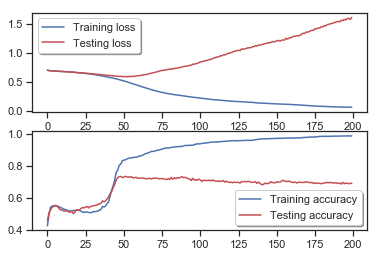

In [58]:
# Plot the loss and accuracy curves for training and validation vs. epochs


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

In [59]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

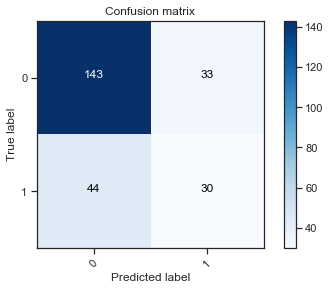

In [60]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.show()

In [61]:
df = pd.read_csv("Exam2019.csv")

In [62]:
df['monthlyamount'] = df['amount']/df['duration']
df = df.dropna(how='any')
df["amount"] = np.log1p(df["amount"])
df["duration"] = np.log1p(df["duration"])
df["monthlyamount"] = np.log1p(df["monthlyamount"])
df = df.dropna(how='any')
SC= StandardScaler()
credit=df['amount'].values
durationcredit = df["duration"].values
creditmonth=df['monthlyamount'].values
credit= credit.reshape(-1,1)
durationcredit = durationcredit.reshape(-1,1)
creditmonth=creditmonth.reshape(-1,1)
df["amount"]= SC.fit_transform(credit)
df["duration"] = SC.fit_transform(durationcredit)
df["monthlyamount"] = SC.fit_transform(creditmonth)

In [63]:
df = df.merge(pd.get_dummies(df.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.status, drop_first=True, prefix='status'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["savings"], drop_first=True, prefix='savings'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["checkingstatus1"], drop_first=True, prefix='checkingstatus1'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.housing, drop_first=True, prefix='housing'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.job, drop_first=True, prefix='job'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.age, drop_first=True, prefix='age'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.history, drop_first=True, prefix='history'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.employ, drop_first=True, prefix='employ'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.others, drop_first=True, prefix='others'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.property, drop_first=True, prefix='property'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.otherplans, drop_first=True, prefix='otherplans'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.tele, drop_first=True, prefix='tele'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.foreign, drop_first=True, prefix='foreign'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.installment, drop_first=True, prefix='installment'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.residence, drop_first=True, prefix='residence'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.cards, drop_first=True, prefix='cards'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.liable, drop_first=True, prefix='liable'), left_index=True, right_index=True)

In [64]:
del df["checkingstatus1"]
del df["savings"]
del df["job"]
del df["status"]
del df["purpose"]
del df["housing"]
del df["history"]
del df["employ"]
del df["others"]
del df["property"]
del df["otherplans"]
del df["age"]
del df["tele"]
del df["foreign"]
del df["installment"]
del df["residence"]
del df["cards"]
del df["liable"]

In [65]:
X = df
X = df.drop('Default', axis= 1)
y = df['Default']
np.random.seed(8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 1)

In [66]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [67]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0, max_depth = 50), GaussianNB()]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Accuracy
Random forest,0.768
Logistic Regression,0.728
Decision Tree,0.724
Radial Svm,0.720
Linear Svm,0.696
KNN,0.616
Naive Bayes,0.352


In [68]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(X_train,y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(X_train,y_train)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(y_test, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(y_test, y_pred_prob_SVMrbf)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(X_train,y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train,y_train)
y_pred_prob_KNN = modelKNN.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(X_train,y_train)
y_pred_prob_Tree = modelTree.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0, max_depth=50)
modelRF.fit(X_train,y_train)
y_pred_prob_rf = modelRF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)


# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(X_train,y_train)
y_pred_prob_nb = modelNB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


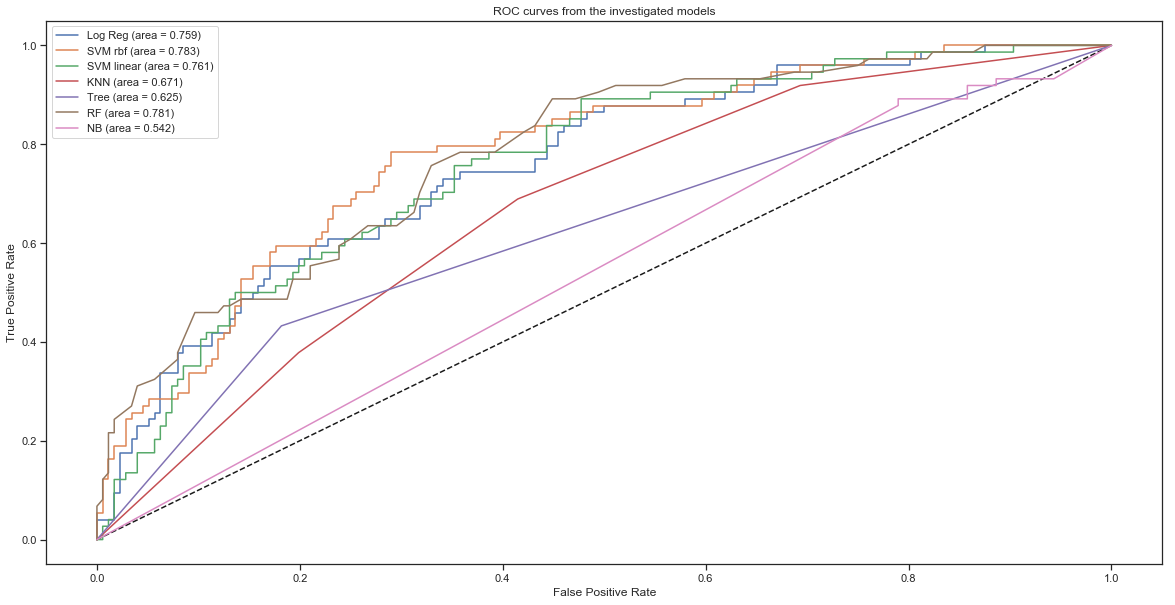

In [69]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

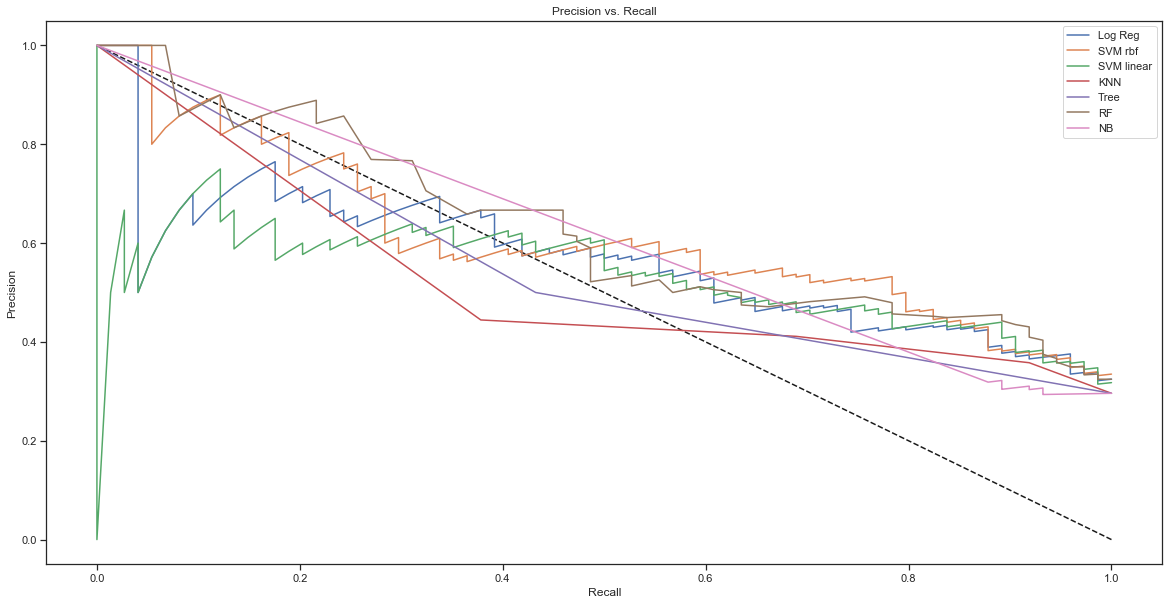

In [70]:
plt.figure(figsize=(20,10))
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [71]:
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [72]:
model = Sequential()
model.add(Dense(8, input_dim=106, activation='relu'))
model.add(Dense(12, input_dim=106, activation='relu'))
model.add(Dense(12, input_dim=106, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [73]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
epoch = 200
batch_size = 128

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, 
          validation_data = (X_test, y_test), verbose = 2)

Train on 1048 samples, validate on 250 samples
Epoch 1/200
 - 1s - loss: 0.6931 - acc: 0.4957 - val_loss: 0.6900 - val_acc: 0.5540
Epoch 2/200
 - 0s - loss: 0.6922 - acc: 0.5253 - val_loss: 0.6875 - val_acc: 0.6200
Epoch 3/200
 - 0s - loss: 0.6912 - acc: 0.5296 - val_loss: 0.6856 - val_acc: 0.6600
Epoch 4/200
 - 0s - loss: 0.6901 - acc: 0.5339 - val_loss: 0.6845 - val_acc: 0.6640
Epoch 5/200
 - 0s - loss: 0.6885 - acc: 0.5453 - val_loss: 0.6806 - val_acc: 0.6800
Epoch 6/200
 - 0s - loss: 0.6859 - acc: 0.5615 - val_loss: 0.6754 - val_acc: 0.6760
Epoch 7/200
 - 0s - loss: 0.6820 - acc: 0.5644 - val_loss: 0.6662 - val_acc: 0.6920
Epoch 8/200
 - 0s - loss: 0.6761 - acc: 0.5706 - val_loss: 0.6563 - val_acc: 0.6800
Epoch 9/200
 - 0s - loss: 0.6674 - acc: 0.5868 - val_loss: 0.6404 - val_acc: 0.6860
Epoch 10/200
 - 0s - loss: 0.6563 - acc: 0.5969 - val_loss: 0.6233 - val_acc: 0.6920
Epoch 11/200
 - 0s - loss: 0.6427 - acc: 0.6059 - val_loss: 0.6071 - val_acc: 0.6900
Epoch 12/200
 - 0s - loss: 

Epoch 97/200
 - 0s - loss: 0.1389 - acc: 0.9580 - val_loss: 1.1960 - val_acc: 0.6840
Epoch 98/200
 - 0s - loss: 0.1374 - acc: 0.9594 - val_loss: 1.2644 - val_acc: 0.6920
Epoch 99/200
 - 0s - loss: 0.1323 - acc: 0.9614 - val_loss: 1.2613 - val_acc: 0.6820
Epoch 100/200
 - 0s - loss: 0.1290 - acc: 0.9628 - val_loss: 1.2692 - val_acc: 0.6800
Epoch 101/200
 - 0s - loss: 0.1300 - acc: 0.9604 - val_loss: 1.3275 - val_acc: 0.7020
Epoch 102/200
 - 0s - loss: 0.1262 - acc: 0.9623 - val_loss: 1.3052 - val_acc: 0.6820
Epoch 103/200
 - 0s - loss: 0.1218 - acc: 0.9652 - val_loss: 1.2990 - val_acc: 0.6860
Epoch 104/200
 - 0s - loss: 0.1221 - acc: 0.9637 - val_loss: 1.3456 - val_acc: 0.6920
Epoch 105/200
 - 0s - loss: 0.1200 - acc: 0.9676 - val_loss: 1.2996 - val_acc: 0.6860
Epoch 106/200
 - 0s - loss: 0.1148 - acc: 0.9676 - val_loss: 1.3566 - val_acc: 0.6920
Epoch 107/200
 - 0s - loss: 0.1180 - acc: 0.9666 - val_loss: 1.3206 - val_acc: 0.6780
Epoch 108/200
 - 0s - loss: 0.1140 - acc: 0.9666 - val_lo

Epoch 193/200
 - 0s - loss: 0.0106 - acc: 0.9971 - val_loss: 2.5043 - val_acc: 0.6680
Epoch 194/200
 - 0s - loss: 0.0102 - acc: 0.9971 - val_loss: 2.5163 - val_acc: 0.6660
Epoch 195/200
 - 0s - loss: 0.0098 - acc: 0.9971 - val_loss: 2.5261 - val_acc: 0.6720
Epoch 196/200
 - 0s - loss: 0.0095 - acc: 0.9971 - val_loss: 2.5482 - val_acc: 0.6640
Epoch 197/200
 - 0s - loss: 0.0094 - acc: 0.9971 - val_loss: 2.5593 - val_acc: 0.6680
Epoch 198/200
 - 0s - loss: 0.0093 - acc: 0.9971 - val_loss: 2.5699 - val_acc: 0.6680
Epoch 199/200
 - 0s - loss: 0.0090 - acc: 0.9971 - val_loss: 2.5824 - val_acc: 0.6680
Epoch 200/200
 - 0s - loss: 0.0088 - acc: 0.9967 - val_loss: 2.5928 - val_acc: 0.6680


In [75]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

250/250 [==============================] - 0s 47us/step
Test score: 2.592778036117554
Test accuracy: 0.6679999976158142


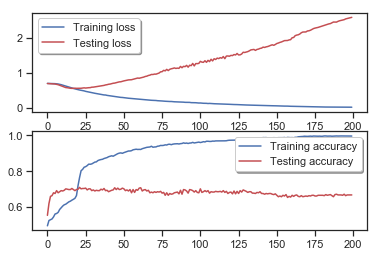

In [76]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

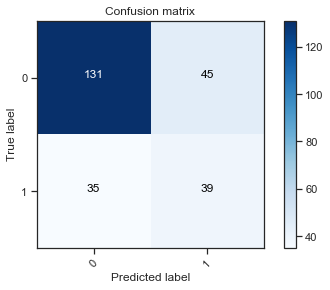

In [77]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.show()

In [78]:
df = pd.read_csv("Exam2019.csv")

In [79]:
df['monthlyamount'] = df['amount']/df['duration']
df = df.dropna(how='any')
df["amount"] = np.log1p(df["amount"])
df["duration"] = np.log1p(df["duration"])
df["monthlyamount"] = np.log1p(df["monthlyamount"])
df = df.dropna(how='any')
SC= StandardScaler()
credit=df['amount'].values
durationcredit = df["duration"].values
creditmonth=df['monthlyamount'].values
credit= credit.reshape(-1,1)
durationcredit = durationcredit.reshape(-1,1)
creditmonth=creditmonth.reshape(-1,1)
df["amount"]= SC.fit_transform(credit)
df["duration"] = SC.fit_transform(durationcredit)
df["monthlyamount"] = SC.fit_transform(creditmonth)

In [80]:
df = df.merge(pd.get_dummies(df.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.status, drop_first=True, prefix='status'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["savings"], drop_first=True, prefix='savings'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["checkingstatus1"], drop_first=True, prefix='checkingstatus1'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.housing, drop_first=True, prefix='housing'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.job, drop_first=True, prefix='job'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.age, drop_first=True, prefix='age'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.history, drop_first=True, prefix='history'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.employ, drop_first=True, prefix='employ'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.others, drop_first=True, prefix='others'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.property, drop_first=True, prefix='property'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.otherplans, drop_first=True, prefix='otherplans'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.tele, drop_first=True, prefix='tele'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.foreign, drop_first=True, prefix='foreign'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.installment, drop_first=True, prefix='installment'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.residence, drop_first=True, prefix='residence'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.cards, drop_first=True, prefix='cards'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.liable, drop_first=True, prefix='liable'), left_index=True, right_index=True)

In [81]:
del df["checkingstatus1"]
del df["savings"]
del df["job"]
del df["status"]
del df["purpose"]
del df["housing"]
del df["history"]
del df["employ"]
del df["others"]
del df["property"]
del df["otherplans"]
del df["age"]
del df["tele"]
del df["foreign"]
del df["installment"]
del df["residence"]
del df["cards"]
del df["liable"]

In [82]:
X = df
X = df.drop('Default', axis= 1)
y = df['Default']
np.random.seed(8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 1)

In [83]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_train, y_train = ada.fit_sample(X_train, y_train)

In [84]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0, max_depth = 50), GaussianNB()]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Accuracy
Random forest,0.756
Radial Svm,0.708
Logistic Regression,0.704
Linear Svm,0.696
Decision Tree,0.664
KNN,0.588
Naive Bayes,0.360


In [85]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(X_train,y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(X_train,y_train)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(y_test, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(y_test, y_pred_prob_SVMrbf)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(X_train,y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train,y_train)
y_pred_prob_KNN = modelKNN.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(X_train,y_train)
y_pred_prob_Tree = modelTree.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0, max_depth=50)
modelRF.fit(X_train,y_train)
y_pred_prob_rf = modelRF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)


# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(X_train,y_train)
y_pred_prob_nb = modelNB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


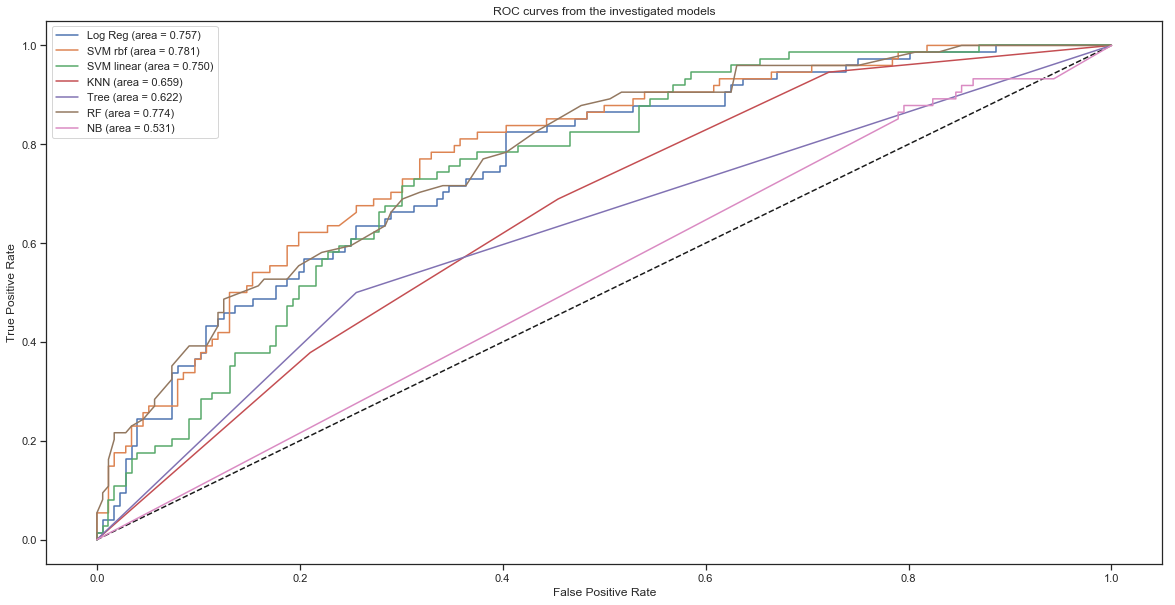

In [86]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

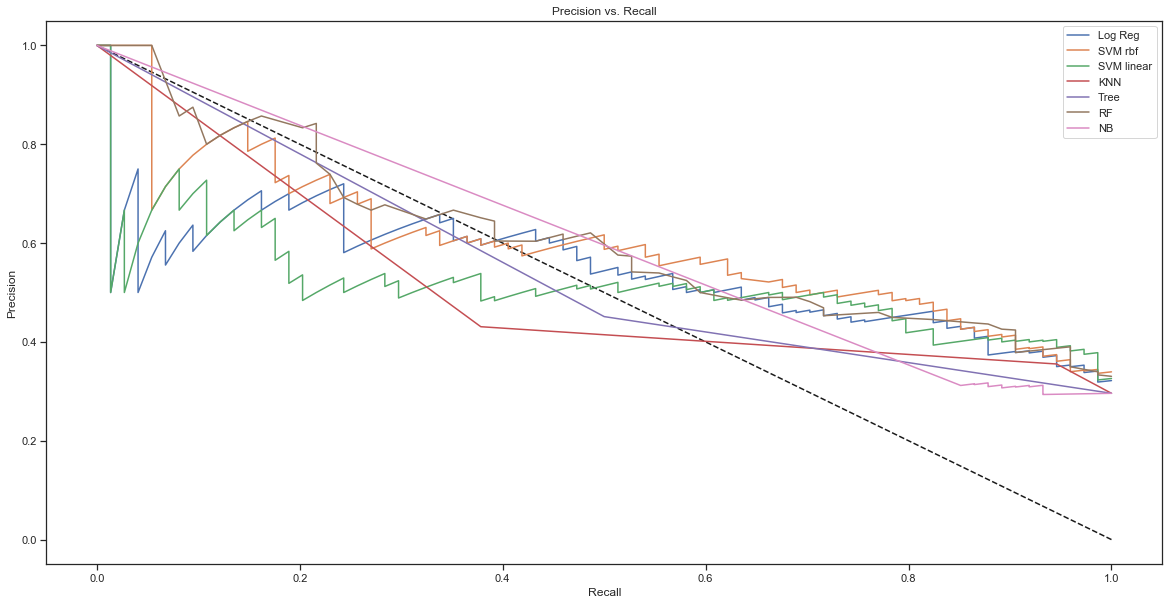

In [87]:
plt.figure(figsize=(20,10))
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [88]:
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [89]:
model = Sequential()
model.add(Dense(8, input_dim=106, activation='relu'))
model.add(Dense(12, input_dim=106, activation='relu'))
model.add(Dense(12, input_dim=106, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [90]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [91]:
epoch = 200
batch_size = 128

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, 
          validation_data = (X_test, y_test), verbose = 2)

Train on 1021 samples, validate on 250 samples
Epoch 1/200
 - 1s - loss: 0.6929 - acc: 0.5039 - val_loss: 0.6922 - val_acc: 0.5120
Epoch 2/200
 - 0s - loss: 0.6922 - acc: 0.5309 - val_loss: 0.6914 - val_acc: 0.5640
Epoch 3/200
 - 0s - loss: 0.6915 - acc: 0.5651 - val_loss: 0.6898 - val_acc: 0.6420
Epoch 4/200
 - 0s - loss: 0.6904 - acc: 0.6048 - val_loss: 0.6879 - val_acc: 0.6800
Epoch 5/200
 - 0s - loss: 0.6888 - acc: 0.6214 - val_loss: 0.6851 - val_acc: 0.6960
Epoch 6/200
 - 0s - loss: 0.6865 - acc: 0.6440 - val_loss: 0.6812 - val_acc: 0.7020
Epoch 7/200
 - 0s - loss: 0.6830 - acc: 0.6611 - val_loss: 0.6753 - val_acc: 0.7060
Epoch 8/200
 - 0s - loss: 0.6776 - acc: 0.6699 - val_loss: 0.6664 - val_acc: 0.7280
Epoch 9/200
 - 0s - loss: 0.6701 - acc: 0.6778 - val_loss: 0.6535 - val_acc: 0.7320
Epoch 10/200
 - 0s - loss: 0.6588 - acc: 0.6871 - val_loss: 0.6400 - val_acc: 0.7320
Epoch 11/200
 - 0s - loss: 0.6447 - acc: 0.6925 - val_loss: 0.6227 - val_acc: 0.7260
Epoch 12/200
 - 0s - loss: 

Epoch 97/200
 - 0s - loss: 0.0871 - acc: 0.9809 - val_loss: 1.3336 - val_acc: 0.6500
Epoch 98/200
 - 0s - loss: 0.0833 - acc: 0.9833 - val_loss: 1.3513 - val_acc: 0.6440
Epoch 99/200
 - 0s - loss: 0.0802 - acc: 0.9848 - val_loss: 1.3625 - val_acc: 0.6480
Epoch 100/200
 - 0s - loss: 0.0788 - acc: 0.9819 - val_loss: 1.3828 - val_acc: 0.6460
Epoch 101/200
 - 0s - loss: 0.0760 - acc: 0.9848 - val_loss: 1.4114 - val_acc: 0.6460
Epoch 102/200
 - 0s - loss: 0.0732 - acc: 0.9833 - val_loss: 1.4156 - val_acc: 0.6500
Epoch 103/200
 - 0s - loss: 0.0704 - acc: 0.9858 - val_loss: 1.4454 - val_acc: 0.6500
Epoch 104/200
 - 0s - loss: 0.0684 - acc: 0.9833 - val_loss: 1.4614 - val_acc: 0.6600
Epoch 105/200
 - 0s - loss: 0.0688 - acc: 0.9824 - val_loss: 1.4963 - val_acc: 0.6400
Epoch 106/200
 - 0s - loss: 0.0650 - acc: 0.9868 - val_loss: 1.4966 - val_acc: 0.6440
Epoch 107/200
 - 0s - loss: 0.0601 - acc: 0.9887 - val_loss: 1.5187 - val_acc: 0.6460
Epoch 108/200
 - 0s - loss: 0.0565 - acc: 0.9897 - val_lo

Epoch 193/200
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 2.8063 - val_acc: 0.6480
Epoch 194/200
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 2.8184 - val_acc: 0.6480
Epoch 195/200
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 2.8223 - val_acc: 0.6460
Epoch 196/200
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 2.8321 - val_acc: 0.6500
Epoch 197/200
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 2.8365 - val_acc: 0.6500
Epoch 198/200
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 2.8422 - val_acc: 0.6480
Epoch 199/200
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 2.8498 - val_acc: 0.6500
Epoch 200/200
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 2.8552 - val_acc: 0.6460


In [92]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

250/250 [==============================] - 0s 47us/step
Test score: 2.8552238693237304
Test accuracy: 0.6460000023841858


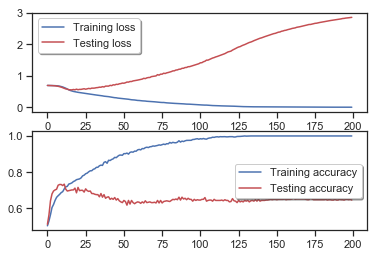

In [93]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

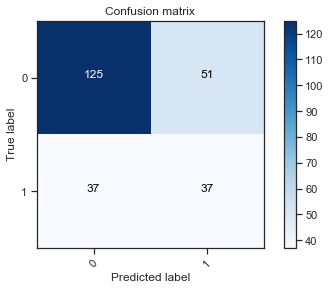

In [94]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.show()